In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'depart-code')))

In [2]:
import Landscape
import numpy as np
# import packages needed

We can use the grad function that is either explicitly given by user or got by automatically derivating.

We test the example whose energy function is shown by 
\begin{aligned}
E(x,y)=x^{4}-1.5x^{2}y^{2}+y^{4}-1.8y^{3}+y^{2}+x^{2}y-2x^{2}.
\end{aligned}

In [3]:
energyfunction = 'x1**4 -1.5*x1**2*x2**2+ x2**4 - 2*x2**3 + x2**2 + x1**2*x2 - 2*x1**2' 
# given energy function

In [4]:
# parameter initialization
x0 = np.array([0.1, 0.1]) # initial point
dt = 1e-2 # time step
k = 2 # the max index of saddle points
acceme = 'none'
maxiter = 10000 # max iter

In [5]:
MyLandscape = Landscape.Landscape(MaxIndex=k, WhetherAutoGrad=True, EnergyFunction=energyfunction,EigenMethod='euler', MaxIterOfCalEigen=1, InitialPoint=x0, TimeStep=dt, AccelerateMethod=acceme, MaxIter=maxiter, CombinationOrder='all', PerturbationNumber=1, PerturbationLength=1e-2, WhetherReport=True, PrintStepInterval=100)
# Instantiation
MyLandscape.run()
# Calculate

Parameters of HiSD solver:
According to the dimension if the 'InitialPoint' parameter, the 'Dim'parameter was automatically set as 2.
The 'InexactGrad' parameter was not passed in. Default value False was used.
The 'Momentum' parameter was not passed in. Default value 0.0 was used.
The 'WhetherBBStep' parameter was not passed in. Default value False was used.
The 'DimerLength' parameter was not passed in. Default value 1e-05 was used.
The 'Tolerance' parameter was not passed in. Default value 1e-06 was used.
The 'NesterovChoice' parameter was not passed in. Default value 1 was used.
The 'SearchArea' parameter was not passed in. Default value 1000.0 was used.
The 'NesterovRestart' parameter was not passed in. Default value None was used.
The 'LOfCalEigen' parameter was not passed in. Default value 1e-05 was used.
The 'DSOfEuler' parameter was not passed in. Default value 1e-05 was used.
The 'ExactHessian' parameter was not passed in. Default value False was used.
The 'WhetherSymSystem' 

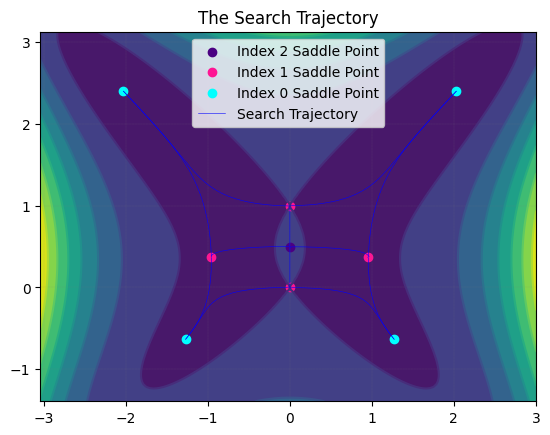

In [6]:
MyLandscape.DrawHeatmap(ContourGridNum=100, ContourGridOut=25, WhetherDetailedTraj=True)
# Draw the search path.

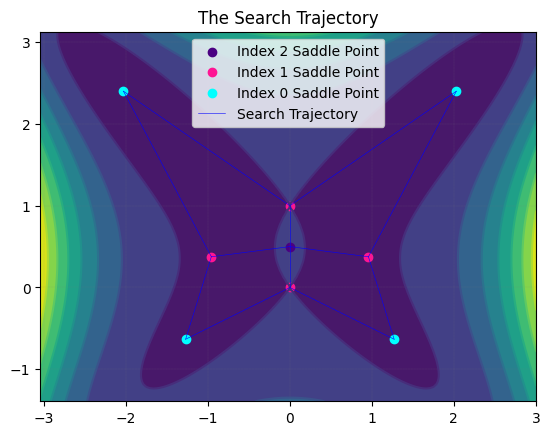

In [7]:
MyLandscape.DrawHeatmap(ContourGridNum=100, ContourGridOut=25, WhetherDetailedTraj=False)
# Draw the search path.

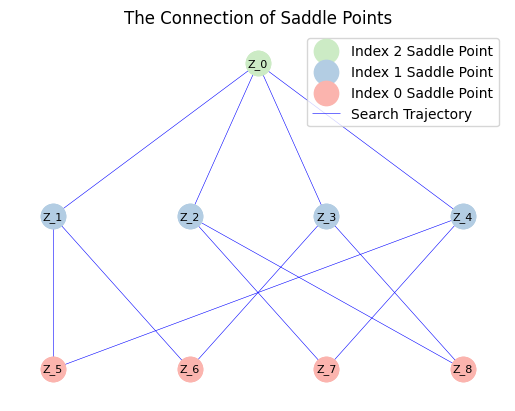

In [8]:
MyLandscape.DrawConnection()
# Draw the decline curve of the norm of gradient vector
MyLandscape.Save('Butterfly')
# Save the output

In [9]:
import json

detail = MyLandscape.detailrecord
output = {
            "StartIndex": [row[1] for row in detail],
            "endIndex": [row[0] for row in detail],
            "Trajectory": [row[2].tolist() for row in detail],
            "TimeList": [row[3].tolist() for row in detail]
        }
print(output)
print(detail[0][2].shape)

with open('detail.json', 'w') as f:
    json.dump(output, f)

{'StartIndex': [-1, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4], 'endIndex': [0, 1, 2, 3, 4, 5, 6, 7, 8, 6, 8, 7, 5], 'Trajectory': [[[0.101, 0.101], [0.09717432301000001, 0.10252025301], [0.09349266067500393, 0.10404852108989864], [0.08994983321360069, 0.10558510790749748], [0.08654081500460972, 0.10713028172316941], [0.0832607338898443, 0.10868427761274338], [0.08010486993631155, 0.1102472995389757], [0.07706865373632314, 0.11181952228140449], [0.07414766431563977, 0.11340109323397561], [0.07133762671214325, 0.11499213407940136], [0.06863440928058227, 0.1165927423487739], [0.0660340207726294, 0.11820299287451332], [0.06353260723577604, 0.11982293914428785], [0.061126448769434065, 0.12145261456310776], [0.058811956171966245, 0.12309203363036704], [0.056585667508191086, 0.12474119303819126], [0.05444424462316123, 0.12640007269704795], [0.05238446962466137, 0.1280686366941888], [0.05040324135387595, 0.1297468341901222], [0.04849757186100578, 0.13143460025796053], [0.04666458290023577, 0.1331318